# Development rig

In [1]:
N,L_d=10,16
import sys

# setting path
sys.path.append('/home/mike/Documents/github/modwaves')

import matplotlib.pyplot as plt
import numpy as np

from scipy.interpolate import make_interp_spline as mis

from waterwaves1.wave import wave1
from waterwaves1.packing import unpack1,pack1
from waterwaves1.fourier import IEj
from waterwaves1.display import eta

def wave_base(n1,n2):
    if n2>0:
        print('n2 must be 0 or negative')
    H=[2**n for n in range(n1,n2)]
    SOL=[wave1(N,h*Hmx_d*d,d=d,scaler=s) for h in H]
    return H,SOL

def check_base(SOL):
    success=[sol.success for sol in SOL]
    return np.all(success)

def xtract(SOL):
    return [sol.x for sol in SOL]

In [2]:
Hmx_d=(0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
d=2*np.pi/L_d
s=d*(1+0.0*Hmx_d)
X=np.linspace(0,np.pi,200)

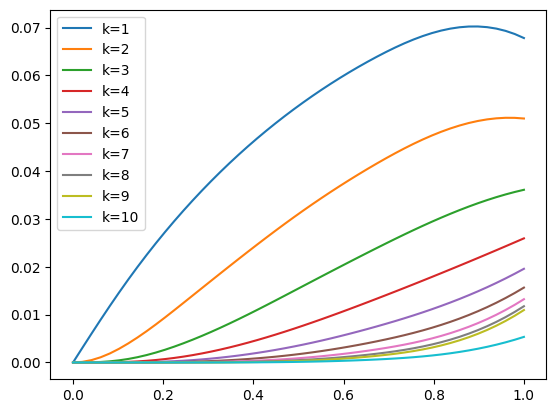

In [3]:
H,SOL=wave_base(-6,0)
if check_base(SOL):
    SOLX=xtract(SOL)
    fs=mis(H,SOLX,k=min(len(H)-1,3))
    Hadd=np.linspace(max(H),1,4)[1:]
    SOLXadd=[wave1(N,h*Hmx_d*d,d=d,scaler=s,A0=fs(h)).x for h in Hadd]
    H+=list(Hadd)
    SOLX+=SOLXadd
    fs=mis(H,SOLX,k=min(len(H)-1,3))
    Hg=np.linspace(0,1)
    plt.plot(Hg,fs(Hg).T[:-2].T,label=[f'k={k+1}' for k in range(10)])
    plt.legend()
    plt.show()
else:
    print('Base invalid')

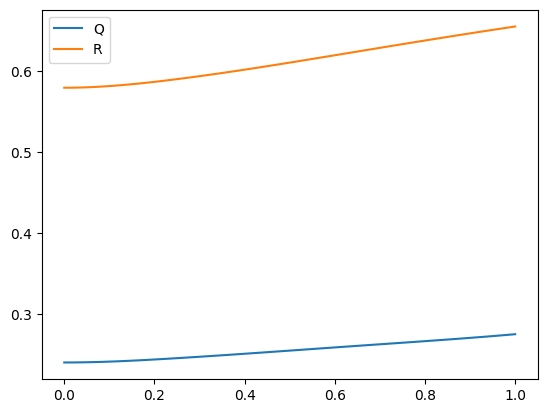

In [4]:
plt.plot(Hg,fs(Hg).T[-2:].T,label=['Q','R'])
plt.legend()
plt.show()

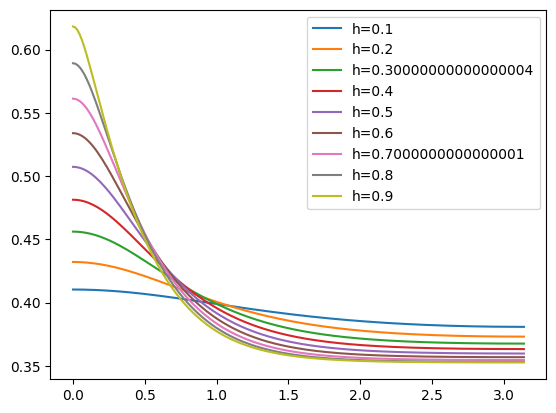

In [10]:
for h in np.linspace(0.1,0.9,9):
    solx=fs(h)
    Np=50
    A0=np.insert(solx,-2,np.zeros(Np))
    solNp=wave1(N+Np,h*Hmx_d*d,d=d,scaler=s,A0=A0)
    eta(X,d,solNp,f'h={h}')
plt.legend()
plt.show()